In [16]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

from astropy.io import ascii

from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from scipy.misc import derivative

In [4]:
#ascii.read("TMHEasyMiniData.txt", data_start = 14)
#ascii.read("TMHStratoData.txt", data_start = 15)

In [5]:
easymini = ascii.read("TMHEasyMiniData.txt", data_start = 14)
stratologger = ascii.read("TMHStratoData.txt", data_start = 15)

In [6]:
emAlt = easymini["altitude"]
emPress = easymini["pressure"]
emAccel = easymini["acceleration"]
emTime = easymini["time"]

slAlt = stratologger["col2"]
slVel = stratologger["col3"]
slTime = stratologger["col1"]

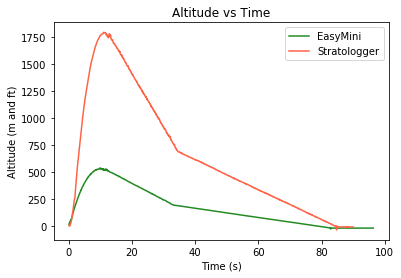

In [7]:
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTime, slAlt, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m and ft)")
show()

In [20]:
mToFt = 3.2808
slAltM = [x/mToFt for x in slAlt]
slVel = [x/mToFt for x in slVel]

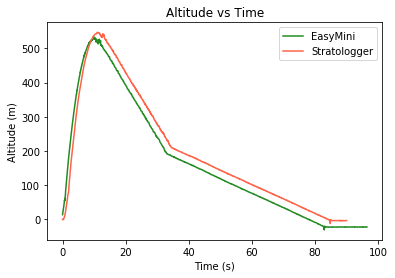

In [9]:
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTime, slAltM, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m)")
show()

In [96]:
print emAlt[500]
print slAltM[116]

timeConversion = emTime[500] - slTime[116]
print timeConversion

399.58
399.292855401
-0.81


In [128]:
slTimeC = []
for i in range(0, len(slTime)):
    slTimeC.append(slTime[i] - .8099999999999996)
t_ap = slTimeC[argmax(slAlt)]
print t_ap

10.24


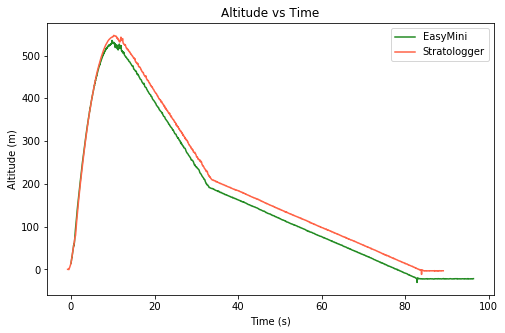

In [107]:
figure(figsize = (8, 5))
plot(emTime, emAlt, c = "forestgreen", label = "EasyMini")
plot(slTimeC, slAltM, c = "tomato", label = "Stratologger")
legend()
title("Altitude vs Time")
xlabel("Time (s)")
ylabel("Altitude (m)")
# xlim(0, .5)
# ylim(-50, 0)
show()

In [50]:
emMax =  max(emAlt)
slMax =  max(slAltM)

print emMax, slMax

# percent difference from the average
percentDiff = abs(slMax - emMax)/((slMax + emMax) / 2.) * 100
print percentDiff
print len(emTime[0:-1])
print len(emVel)

535.16 547.122653011
2.21063378927
2092
2092


In [81]:
# emVel = diff(emAlt) / (emTime[1]-emTime[0]) # divide differences between altitudes by time step for velocity
emVel = [0.0]
for i in range(1, len(emAlt)) :
    emVel.append((emAlt[i] - emAlt[i-1]) / (emTime[i] - emTime[i-1]))
smoothVel = gaussian_filter1d(emVel, 10)

time_diff = slTimeC[argmax(slVel)] - emTime[argmax(smoothVel)]
print time_diff
print slTimeC[argmax(slVel)]
print emTime[argmax(smoothVel)]
# emTime = [t + time_]



-1.51
1.29
2.8


/Users/Lia/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


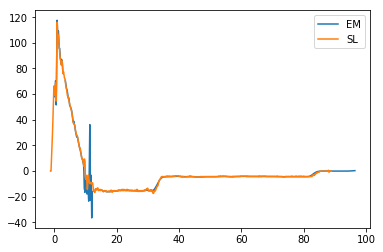

In [119]:
#plot(emTime[1:], emVel)
plot(emTime, smoothVel, label = "EM")
# plot(emTime[1:], emVel, label = "EM")
plot([x-.32 for x in slTimeC],slVel, label = "SL")# this in not long-term acceptable
legend()
# xlim(0, 3)
# ylim(-20, 0)

In [46]:
# gaussian_filter1d?

In [ ]:
smoothEM = gaussian_filter1d(emAlt, 2)
smoothSL = gaussian_filter1d(slAltM, 2)

In [ ]:
plot(emTime, smoothEM)
plot(slTime, smoothSL)

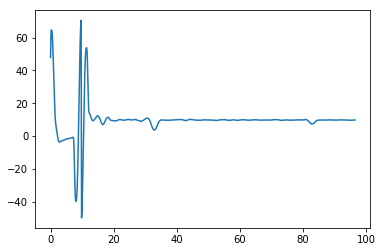

In [142]:
emAccel[970:] = emAccel[970:] * -1
plot(emTime, [x+9.8 for x in emAccel])
# xlim(2.5,3)
# ylim(-5, 0)

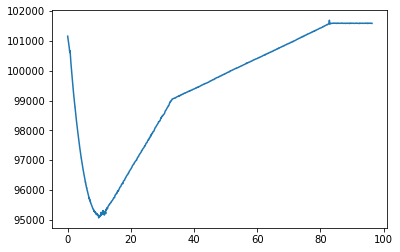

In [141]:
plot(emTime, emPress)

In [ ]:
max(emAlt)

In [ ]:
emAlt[970]

In [ ]:
emTime[970]

In [36]:
print emTime

 time
-----
  0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
  ...
95.36
95.46
95.56
95.66
95.76
95.86
95.96
96.06
96.16
96.26
96.36
Length = 2093 rows


In [37]:
print range(2)

[0, 1]


In [58]:
# argmax?

In [ ]:
# Fd = ma = .5 * cd * v^2 * r

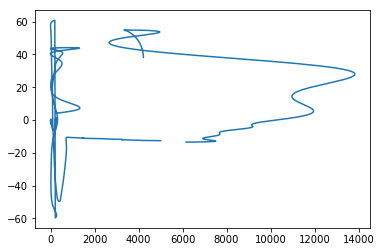

In [147]:
plot([x**2 for x in smoothVel], emAccel)

In [164]:
T = 290 # [K]
R = 287 # [J/(kg*K)]
rho = [x / (T*R) for x in emPress]  # [kg/m^2]

In [165]:
inToM = 0.0254
A = (3.15**2 * pi + 4 * .25 * 3.5) * inToM**2   #[m^2]
m = 5.127    # [kg] dry mass
C = 2 * m / A   # [kg/m^2]
cd = []
for i in range(len(emPress)) :
    v = smoothVel[i]
    a = emAccel[i]
    #stupid time issue, will work on later
    cd.append(C * a / (v**2 * rho[i]))
print cd

[3.4121373005070863, 3.5335378787589677, 3.6588968225374736, 3.7878033446580686, 3.9186877330917977, 4.0528301007458518, 4.1889524546116927, 4.3268182143414249, 4.4667088345225423, 4.6073831414979711, 4.7486393227542552, 4.8882009298568088, 5.027621385063112, 5.1641644998413643, 5.2979697653447424, 5.4265595756384606, 5.5505693112098315, 5.6672673143428831, 5.7763434604596844, 5.8770524939199706, 5.9670379986919215, 6.0450091498013805, 6.1094184770349038, 6.1611096210379168, 6.1969394920981946, 6.2162258843684697, 6.2198018714924403, 6.2031221444080344, 6.1690707327451948, 6.1164875761490096, 6.0459356246997675, 5.9583653596046151, 5.8565953978147736, 5.7398214532819036, 5.6129869330547741, 5.4756874576521177, 5.3338794504890581, 5.1878165293697629, 5.040864735348511, 4.8955891758980314, 4.7560700551610102, 4.6235519208829041, 4.5016216193856753, 4.3921011527962621, 4.2971329921767083, 4.2179838305168307, 4.1555681513291294, 4.1126936943088328, 4.0889274175602841, 4.0861571514192701, 4

(0, 1)

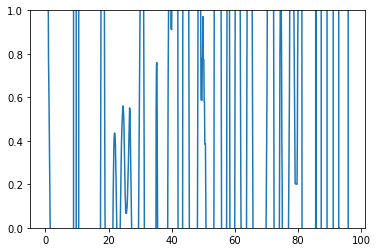

In [162]:
plot(emTime, cd)
# xlim(0,10)
ylim(0,1)
#fuck time